In [ ]:
# Ch07-2 Graph Genomes

In [1]:
# Install networkx
! pip install networkx

In [ ]:
# Import libraries
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Create a variation graph
def create_variation_graph():
    """
    Creates a graph representing a small genome with variations.
    
    Returns:
        G (nx.DiGraph): Directed graph of the genome.
    """
    G = nx.DiGraph()

    # Add nodes (segments of the genome)
    # Each node represents a segment of the genome
    G.add_node("1", seq="ATGCG")
    G.add_node("2", seq="A")  # Reference SNP
    G.add_node("2_alt", seq="T")  # SNP Variant
    G.add_node("3", seq="C")
    G.add_node("4", seq="G")
    G.add_node("5", seq="GTT")  # Insertion
    G.add_node("6", seq="TAA")

    # Add edges (connections between segments)
    # Reference path
    G.add_edge("1", "2")
    G.add_edge("2", "3")
    G.add_edge("3", "4")
    G.add_edge("4", "6")

    # Variant paths
    G.add_edge("1", "2_alt")
    G.add_edge("2_alt", "3")
    G.add_edge("4", "5")
    G.add_edge("5", "6")

    return G

In [ ]:
# Step 2: Traverse the graph to find all haplotypes
def find_haplotypes(G, start="1", end="6"):
    """
    Finds all paths (haplotypes) from the start to the end of the graph.
    
    Parameters:
        G (nx.DiGraph): The genome graph.
        start (str): The start node.
        end (str): The end node.
    
    Returns:
        haplotypes (list): List of haplotype sequences.
    """
    paths = list(nx.all_simple_paths(G, source=start, target=end))
    haplotypes = []

    for path in paths:
        seq = "".join(G.nodes[node]["seq"] for node in path)
        haplotypes.append(seq)

    return haplotypes

In [ ]:
# Step 3: Visualize the graph
def visualize_graph(G):
    """
    Visualizes the genome graph using matplotlib.
    """
    pos = nx.spring_layout(G)  # Compute layout
    labels = {node: G.nodes[node]["seq"] for node in G.nodes}  # Node labels

    # Create the plot
    plt.figure(figsize=(8, 6))
    nx.draw(
        G, pos, with_labels=True, labels=labels,
        node_size=2000, node_color="skyblue", edge_color="black"
    )
    plt.title("Genome Variation Graph")
    plt.show()

All possible haplotypes:
ATGCGACGTAA
ATGCGACGGTTTAA
ATGCGTCGTAA
ATGCGTCGGTTTAA


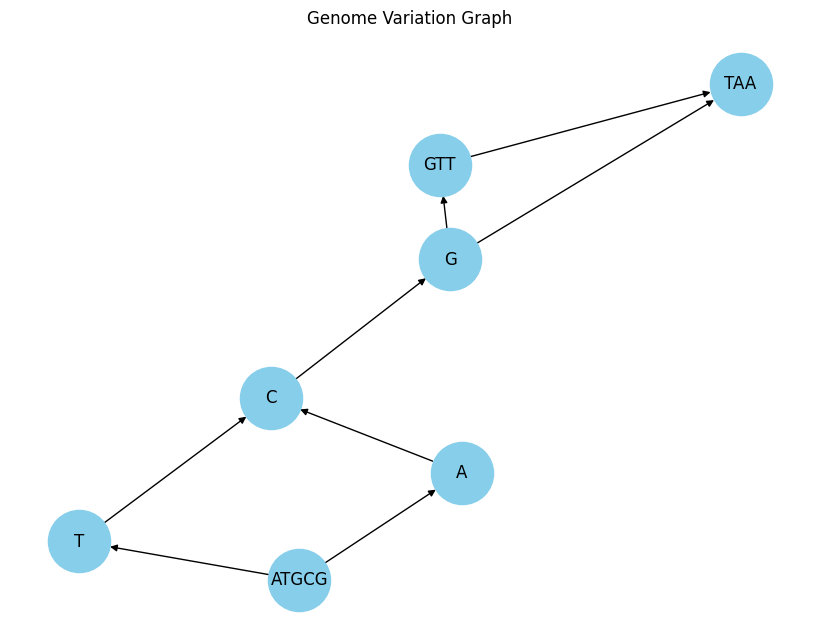

In [2]:
# Main execution
if __name__ == "__main__":
    # Create the graph
    graph = create_variation_graph()

    # Find all haplotypes
    haplotypes = find_haplotypes(graph)
    print("All possible haplotypes:")
    for haplotype in haplotypes:
        print(haplotype)

    # Visualize the graph
    visualize_graph(graph)

In [ ]:
## End of Notebook ##